<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_fev_2020/blob/master/Features_Determination_fev_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [2]:

!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

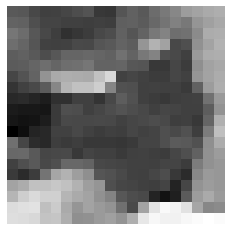

In [6]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[5], cmap = "gray")

In [0]:
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [8]:
print(len(img_name))

540


In [0]:
# ww contain all photos in black and white
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)


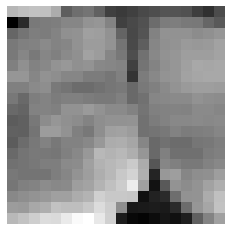

In [10]:
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [12]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.062114   15.805556  0.118833  ...     2.600961 -0.510280  0.968961
1   0.054688   59.854167 -0.082244  ...     2.712072 -0.621625  0.989078
2   0.052951   90.243056 -0.000144  ...     2.840748 -0.725483  0.995986
3   0.052083   90.388889  0.160040  ...     2.771303 -0.680857  0.993830
4   0.053434   77.562500  0.331489  ...     2.764495 -0.644239  0.991322
5   0.060185   46.638889  0.507428  ...     2.696888 -0.673112  0.992278
6   0.064333   41.708333  0.522625  ...     2.634252 -0.634782  0.988039
7   0.058931   30.319444  0.483757  ...     2.319265 -0.723731  0.995494
8   0.057388   19.104167  0.481467  ...     2.259791 -0.750027  0.996652
9   0.053434   32.263889  0.207233  ...     2.535192 -0.732016  0.996303
10  0.051890   43.611111  0.369478  ...     2.595990 -0.779193  0.997869
11  0.056713   38.555556  0.426907  ...     2.498496 -0.744323  0.996186
12  0.058256   26.868056  0.170268  ...     2.41516

In [13]:
print(len(df['ASM']))

17


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


In [0]:
# compara constrast dos tres primeiros buracos
Num=len(Posicao_Buraco)
Matriz_X_Buraco=[]
#Num=3
for i in range(Num):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Buraco.append(np.array(df['constrast']).ravel())
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(Matriz_X_Buraco)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco)

In [0]:
# compara constrast dos graos
Num=len(Posicao_Grao)
Matriz_X_Grao=[]
for i in range(Num):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Grao.append(np.array(df['constrast']).ravel())
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(Matriz_X_Grao)
Contraste_Grao=pd.DataFrame(Matriz_X_Grao)

In [0]:
# compara constrast dos indefinidos
Num=len(Posicao_Indef)
Matriz_X_Indef=[]
for i in range(Num):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Indef.append(np.array(df['constrast']).ravel())
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(Matriz_X_Indef)
Contraste_Indef=pd.DataFrame(Matriz_X_Indef)

In [18]:
print(Contraste_Buraco.head())

           0           1           2   ...          14          15          16
0   15.805556   59.854167   90.243056  ...   22.236111  221.625000  263.694444
1  334.513889  166.770833   21.409722  ...  160.145833  162.298611  266.145833
2   36.465278   73.875000  118.305556  ...  169.034722  264.666667  309.222222
3   77.875000  403.062500  868.902778  ...   32.930556  123.861111  439.076389
4   30.006944   13.534722   20.555556  ...  343.784722  177.465278  235.729167

[5 rows x 17 columns]


In [19]:
print(Contraste_Grao.head())

            0           1           2   ...           14           15           16
0  1452.465278  123.659722   90.680556  ...   366.958333   218.270833  5263.263889
1   617.437500  124.784722  154.604167  ...   184.500000   694.937500  2631.937500
2  1004.381944  934.819444  676.111111  ...  3327.958333  3854.965278  2758.576389
3   762.923611  234.847222  404.520833  ...   684.680556  3793.701389  4317.569444
4    37.902778  174.916667  514.861111  ...   613.597222   771.958333   824.465278

[5 rows x 17 columns]


In [20]:
print(Contraste_Indef.head())

          0          1           2   ...          14          15          16
0  37.972222  18.263889   28.798611  ...   60.763889   25.881944   25.736111
1  95.055556  73.715278   66.451389  ...  350.159722   83.847222   79.111111
2  36.791667  66.888889  109.944444  ...  173.312500  467.222222  562.833333
3  47.861111  63.020833   82.118056  ...  131.583333  341.916667  368.111111
4  41.888889  14.937500    3.284722  ...   86.388889   66.583333   37.548611

[5 rows x 17 columns]


In [21]:
# found drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
# get csv file
Contraste_Buraco.to_csv('Contraste_Buraco_jan_2020.csv')

In [0]:
# get csv file
Contraste_Grao.to_csv('Contraste_Grao_jan_2020.csv')

In [0]:
# get csv file
Contraste_Indef.to_csv('Contraste_Indef_jan_2020.csv')

In [0]:
# save in drive
!cp Contraste_Buraco_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Grao_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Indef_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/